In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

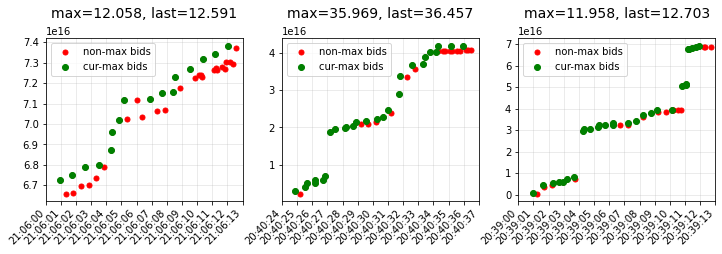

In [139]:
f, axarr = plt.subplots(ncols=3, figsize=(12,3))

files = ['slot-50006131.csv', 'slot-5006003.csv', 'slot-5005996.csv']
startSeconds = [0, 24, 0]
prefixes = ['2023-02-16 21:06:{:0d}', '2023-02-16 20:40:{:0d}', '2023-02-16 20:39:{:0d}']
for i in range(3):
    df = pd.read_csv(files[i], delimiter="|")
    df['received_at'] = pd.to_datetime(df.received_at, format="%Y-%m-%d%H:%M:%S.%f")
    df['inserted_at'] = pd.to_datetime(df.inserted_at, format="%Y-%m-%d%H:%M:%S.%f")
    
    stamps = []
    for j in range(startSeconds[i], startSeconds[i]+14):
        stamps.append(datetime.strptime(prefixes[i].format(j), '%Y-%m-%d %H:%M:%S'))
    start, end = stamps[0], stamps[-1]
    
    curMaxes = []
    vals = df['value'].values
    for k in range(len(vals)):
        if np.all(vals[k] > vals[:k]):
            curMaxes.append(k)
    curMaxes = np.asarray(curMaxes)
    
    axarr[i].plot(df['received_at'], df['value'], 'r.', markersize=10, label='non-max bids')
    axarr[i].plot(df['received_at'].values[curMaxes], df['value'].values[curMaxes], 
                  'g.', markersize=12, label='cur-max bids')

    axarr[i].set_xlim(start, end)
    axarr[i].set_xticks(stamps)
    axarr[i].set_xticklabels([str(s)[-8:] for s in stamps], rotation = 45, ha="right")
    axarr[i].grid(alpha=0.3)
    axarr[i].set_title('max={}, last={}'.format(
        str(df['received_at'][curMaxes[-1]])[-9:-3], str(df['received_at'][len(vals)-1])[-9:-3]), size=14, pad=20)
    axarr[i].legend()
    


plt.show()

In [20]:
df = pd.read_csv('slot-50006131.csv', delimiter="|")
df['received_at'] = pd.to_datetime(df.received_at, format="%Y-%m-%d%H:%M:%S.%f")
df['inserted_at'] = pd.to_datetime(df.inserted_at, format="%Y-%m-%d%H:%M:%S.%f")
df.head()

,received_at,inserted_at,value
0,2023-02-16 21:06:00.919135,2023-02-16 21:06:01.085221,67281484127024276
1,2023-02-16 21:06:01.328595,2023-02-16 21:06:01.470227,66590004715655076
2,2023-02-16 21:06:01.733270,2023-02-16 21:06:01.896883,67503733936035076
3,2023-02-16 21:06:01.826910,2023-02-16 21:06:01.951666,66644159215655076
4,2023-02-16 21:06:02.324864,2023-02-16 21:06:02.432912,66966498715655076


In [32]:
type(df['received_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
stamps = []
for i in range(14):
    stamps.append(datetime.strptime('2023-02-16 21:06:{:0d}'.format(i), '%Y-%m-%d %H:%M:%S'))
start, end = stamps[0], stamps[-1]

In [64]:
curMaxes = []
vals = df['value'].values
for i in range(len(vals)):
    if np.all(vals[i] > vals[:i]):
        curMaxes.append(i)
curMaxes = np.asarray(curMaxes)

In [65]:
curMaxes

array([ 0,  2,  5,  8, 10, 11, 12, 13, 17, 19, 21, 22, 24, 29, 31, 37])

In [97]:
str(df['received_at'][len(vals)-1])[-9:]

'12.591273'

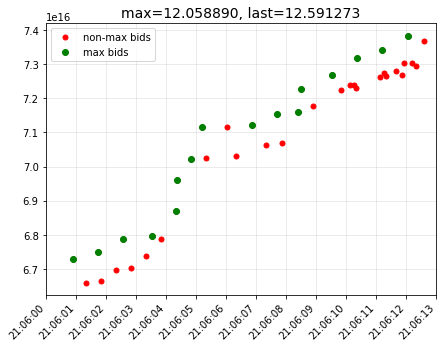

In [101]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(df['received_at'], df['value'], 'r.', markersize=10, label='non-max bids')
ax.plot(df['received_at'].values[curMaxes], df['value'].values[curMaxes], 'g.', markersize=12, label='max bids')

ax.set_xlim(start, end)
ax.set_xticks(stamps)
ax.set_xticklabels([str(s)[-8:] for s in stamps], rotation = 45, ha="right")
ax.grid(alpha=0.3)
ax.set_title('max={}, last={}'.format(
    str(df['received_at'][curMaxes[-1]])[-9:], str(df['received_at'][len(vals)-1])[-9:]), size=14)
ax.legend()
plt.show()

In [130]:
df = pd.read_csv('slot-5006003.csv', delimiter="|")
df['received_at'] = pd.to_datetime(df.received_at, format="%Y-%m-%d%H:%M:%S.%f")
df['inserted_at'] = pd.to_datetime(df.inserted_at, format="%Y-%m-%d%H:%M:%S.%f")
df.head()

,received_at,inserted_at,value
0,2023-02-16 20:40:24.842566,2023-02-16 20:40:24.855916,3064134118970310
1,2023-02-16 20:40:25.169057,2023-02-16 20:40:25.182422,2292116934355174
2,2023-02-16 20:40:25.495319,2023-02-16 20:40:25.509207,3981380422497670
3,2023-02-16 20:40:25.670816,2023-02-16 20:40:25.699005,5063148959455718
4,2023-02-16 20:40:26.159261,2023-02-16 20:40:26.188086,5158384276627926


In [131]:
stamps = []
for i in range(24,38):
    stamps.append(datetime.strptime('2023-02-16 20:40:{:0d}'.format(i), '%Y-%m-%d %H:%M:%S'))
start, end = stamps[0], stamps[-1]

In [132]:
curMaxes = []
vals = df['value'].values
for i in range(len(vals)):
    if np.all(vals[i] > vals[:i]):
        curMaxes.append(i)
curMaxes = np.asarray(curMaxes)

In [133]:
curMaxes

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 18, 19, 20,
       22, 23, 25, 27, 28, 29, 30, 31, 36, 40])

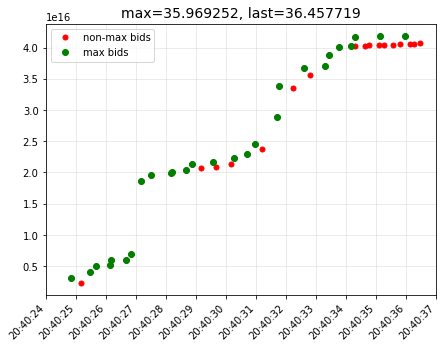

In [134]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(df['received_at'], df['value'], 'r.', markersize=10, label='non-max bids')
ax.plot(df['received_at'].values[curMaxes], df['value'].values[curMaxes], 'g.', markersize=12, label='max bids')

ax.set_xlim(start, end)
ax.set_xticks(stamps)
ax.set_xticklabels([str(s)[-8:] for s in stamps], rotation = 45, ha="right")
ax.grid(alpha=0.3)
ax.set_title('max={}, last={}'.format(
    str(df['received_at'][curMaxes[-1]])[-9:], str(df['received_at'][len(vals)-1])[-9:]), size=14)
ax.legend()
plt.show()

In [54]:
ax.get_xticklabels()

[Text(19404.879166666666, 0, '2023-02-16'),
 Text(19404.879178240742, 0, '2023-02-16'),
 Text(19404.879189814816, 0, '2023-02-16'),
 Text(19404.87920138889, 0, '2023-02-16'),
 Text(19404.879212962962, 0, '2023-02-16'),
 Text(19404.87922453704, 0, '2023-02-16'),
 Text(19404.879236111112, 0, '2023-02-16'),
 Text(19404.879247685185, 0, '2023-02-16'),
 Text(19404.879259259258, 0, '2023-02-16'),
 Text(19404.879270833335, 0, '2023-02-16'),
 Text(19404.879282407408, 0, '2023-02-16'),
 Text(19404.87929398148, 0, '2023-02-16'),
 Text(19404.879305555554, 0, '2023-02-16'),
 Text(19404.87931712963, 0, '2023-02-16')]

In [ ]:
df = pd.read_csv('slot-50006131.csv', delimiter="|")
df['received_at'] = pd.to_datetime(df.received_at, format="%Y-%m-%d%H:%M:%S.%f")
df['inserted_at'] = pd.to_datetime(df.inserted_at, format="%Y-%m-%d%H:%M:%S.%f")
df.head()

type(df['received_at'][0])

stamps = []
for i in range(14):
    stamps.append(datetime.strptime('2023-02-16 21:06:{:0d}'.format(i), '%Y-%m-%d %H:%M:%S'))
start, end = stamps[0], stamps[-1]

curMaxes = []
vals = df['value'].values
for i in range(len(vals)):
    if np.all(vals[i] > vals[:i]):
        curMaxes.append(i)
curMaxes = np.asarray(curMaxes)

curMaxes

str(df['received_at'][len(vals)-1])[-9:]

f, ax = plt.subplots(figsize=(7,5))

ax.plot(df['received_at'], df['value'], 'r.', markersize=10, label='non-max bids')
ax.plot(df['received_at'].values[curMaxes], df['value'].values[curMaxes], 'g.', markersize=12, label='max bids')

ax.set_xlim(start, end)
ax.set_xticks(stamps)
ax.set_xticklabels([str(s)[-8:] for s in stamps], rotation = 45, ha="right")
ax.grid(alpha=0.3)
ax.set_title('max={}, last={}'.format(
    str(df['received_at'][curMaxes[-1]])[-9:], str(df['received_at'][len(vals)-1])[-9:]), size=14)
ax.legend()
plt.show()

ax.get_xticklabels()